Text(0.5, 1.0, 'WHLcoeff of TWO')

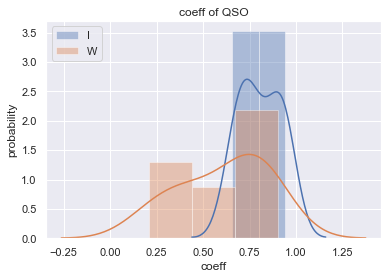

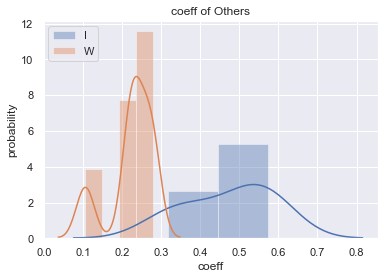

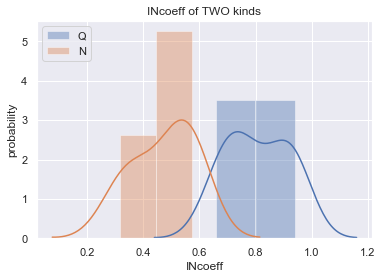

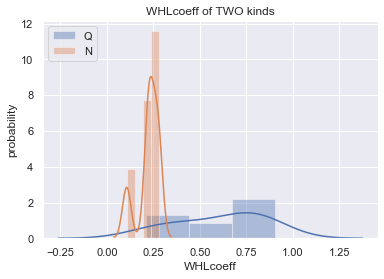

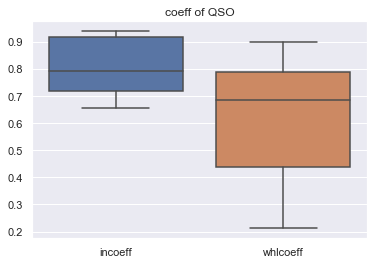

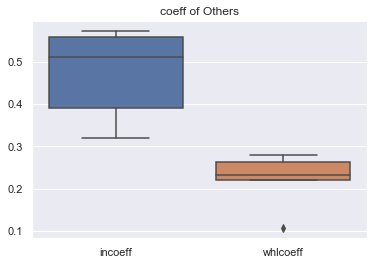

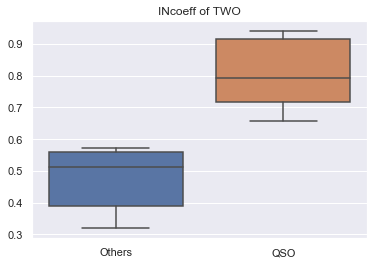

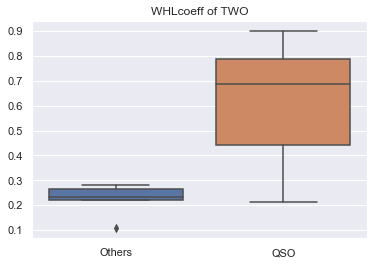

In [2]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

path = "D:\\PhD\QSO\\code\\QSOv1\\result\\result_QSO_m_30.mat"  # mat文件路径
data = loadmat(path)

resultm = data['resultm']  # 数
obsid=resultm[:,0]

incoeff=resultm[:,5]
incoeff=incoeff.astype(float).reshape(incoeff.size,1)

whlcoeff=resultm[:,4]
whlcoeff=whlcoeff.astype(float).reshape(whlcoeff.size,1)
label=resultm[:,6]
label=label.astype(int).reshape(label.size,1)

fz=resultm[:,2]
fz=fz.astype(float).reshape(fz.size,1)

indices = (label == 1)
qso_incoeff=incoeff[indices]
qso_whlcoeff=whlcoeff[indices]

indices = (label == 0) & (fz<9999)
nonqso_incoeff=incoeff[indices]
nonqso_whlcoeff=whlcoeff[indices]

plt.figure()
sns.distplot(qso_incoeff)
sns.distplot(qso_whlcoeff)
plt.title("coeff of QSO")
plt.xlabel('coeff')
plt.ylabel('probability')
plt.legend('IW',loc='upper left');

plt.figure()
sns.distplot(nonqso_incoeff)
sns.distplot(nonqso_whlcoeff)
plt.title("coeff of Others")
plt.xlabel('coeff')
plt.ylabel('probability')
plt.legend('IW',loc='upper left');

plt.figure()
sns.distplot(qso_incoeff)
sns.distplot(nonqso_incoeff)
plt.title("INcoeff of TWO kinds")
plt.xlabel('INcoeff')
plt.ylabel('probability')
plt.legend('QN',loc='upper left');

plt.figure()
sns.distplot(qso_whlcoeff)
sns.distplot(nonqso_whlcoeff)
plt.title("WHLcoeff of TWO kinds")
plt.xlabel('WHLcoeff')
plt.ylabel('probability')
plt.legend('QN',loc='upper left');

label=pd.Series(label.reshape(label.size))
incoeff=pd.Series(incoeff.reshape(incoeff.size))
whlcoeff=pd.Series(whlcoeff.reshape(whlcoeff.size))
df=pd.DataFrame({'label': label, 'incoeff': incoeff, 'whlcoeff': whlcoeff})

indices = (label == 1)
dfpure=df.loc[df.label ==1, :]

plt.figure()
sns.boxplot(data=dfpure.loc[:, ['incoeff', 'whlcoeff']])
plt.title("coeff of QSO")

labelvalue=label.values
indices2 = (label.values == 0) & (fz.reshape(fz.size)<9999)
dfpure2=df.loc[indices2, :]

plt.figure()
sns.boxplot(data=dfpure2.loc[:, ['incoeff', 'whlcoeff']])
plt.title("coeff of Others")

data=df.loc[indices2, ['incoeff']]
label0=data['incoeff']
data=df.loc[indices, ['incoeff']]
label1=data['incoeff']
incoeffoftwo = pd.DataFrame({'Others': label0, 'QSO': label1})
plt.figure()
sns.boxplot(data=incoeffoftwo)
plt.title("INcoeff of TWO")

data=df.loc[indices2, ['whlcoeff']]
label0=data['whlcoeff']
data=df.loc[indices, ['whlcoeff']]
label1=data['whlcoeff']
whlcoeffoftwo = pd.DataFrame({'Others': label0, 'QSO': label1})
plt.figure()
sns.boxplot(data=whlcoeffoftwo)
plt.title("WHLcoeff of TWO")